<a href="https://colab.research.google.com/github/mesrp88/deep_learning_note/blob/main/activations_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementating activation function using PYTHON

In [1]:
import math

In [2]:
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [3]:
sigmoid(2)

0.8807970779778823

In [4]:
def tanh(x):
  return math.exp(-x)-math.exp(x)/(math.exp(-x)+math.exp(x))

In [5]:
tanh(2)

-0.8466785068012957

In [6]:
def relu(x):
  return max(0,x)

In [7]:
relu(2)

2

In [8]:
relu(-2)

0

In [9]:
def leaky_relu(x):
  return max(0.1*x, x)

In [10]:
leaky_relu(2)

2

In [11]:
leaky_relu(-2)

-0.2

In [12]:
def swish(x):
  return x/(1+math.exp(-x))

In [13]:
swish(2)

1.7615941559557646

In [14]:
import tensorflow as tf
from tensorflow import keras


In [15]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [16]:
X_train[0].shape

(28, 28)

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
import matplotlib.pyplot as plt


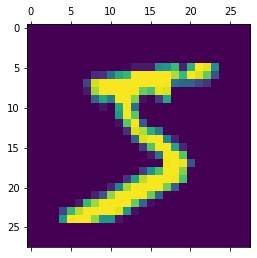

In [19]:
plt.matshow(X_train[0], fignum=1)
plt.show()

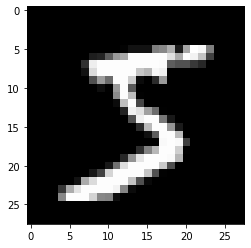

In [20]:
X_train_norm= X_train[0]/255
plt.imshow(X_train[0], cmap= 'gray') #0=black,1=white
plt.show()

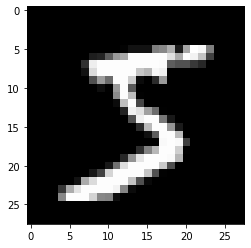

In [21]:
X_train_norm= X_train[0]/255
plt.imshow(X_train_norm, cmap= 'gray') #0=black,1=white
plt.show()

In [22]:
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(100, activation=tf.nn.relu),
                         keras.layers.Dense(10, activation= "sigmoid")
])

model.compile(optimizer= 'adam', 
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

model.fit(X_train/255, y_train, epochs= 10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2743 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1249 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0327 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [23]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0934 - accuracy: 0.9764


[0.0933937355875969, 0.9764000177383423]

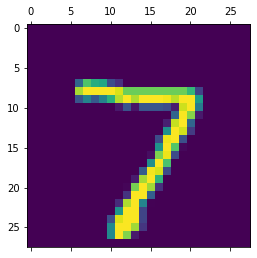

In [24]:
plt.matshow(X_test[0])

In [25]:
prediction=model.predict(X_test)

In [26]:
import numpy as np
np.argmax(prediction[0])

3

Implement mean squared error (or MSE) in two ways,

1) Without using numpy (i.e. using plain python)

2) With the use of numpy

In [27]:
def mse(y_pred, y_true):
  total_squ_error= 0
  for yp, yt in zip(y_pred, y_true):
    total_squ_error+= (yp-yt)**2
  mse= total_squ_error/len(y_pred)
  return mse

In [28]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [30]:
mse(y_predicted, y_true)

0.366

In [31]:
def mse_n(y_pred, y_true):
  return np.mean((y_pred-y_true)**2)

In [32]:
mse_n(y_predicted, y_true)

0.366